In [1]:
import numpy as np
import random
import cv2
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
import sys; sys.path.insert(0, '..')
from src.data.make_dataset import *
from src.features.build_features import *
from src.models import predict_model, train_model
from src.visualization.visualize import *

In [3]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # for disabling GPU

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14447075629560744285
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10099490816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4074387354331319108
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [5]:
random.seed(0)

In [6]:
X, y = preprocess(generate_dataset(50000))
print(X.shape, y.shape)

(50000, 64, 64, 1) (50000, 4)


In [7]:
from tensorflow import keras

In [8]:
model = train_model.make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 31, 31, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [9]:
model, history = train_model.compile_and_train(model, X, y)

Epoch 1/100
157/157 [==============================] - 8s 19ms/step - loss: 0.1777 - val_loss: 0.1636
Epoch 2/100
157/157 [==============================] - 3s 17ms/step - loss: 0.0937 - val_loss: 0.0763
Epoch 3/100
157/157 [==============================] - 3s 17ms/step - loss: 0.0630 - val_loss: 0.0490
Epoch 4/100
157/157 [==============================] - 3s 18ms/step - loss: 0.0490 - val_loss: 0.0396
Epoch 5/100
157/157 [==============================] - 3s 17ms/step - loss: 0.0412 - val_loss: 0.0373
Epoch 6/100
157/157 [==============================] - 3s 18ms/step - loss: 0.0411 - val_loss: 0.0332
Epoch 7/100
157/157 [==============================] - 3s 18ms/step - loss: 0.0346 - val_loss: 0.0419
Epoch 8/100
157/157 [==============================] - 2s 16ms/step - loss: 0.0979 - val_loss: 0.0656
Epoch 9/100
157/157 [==============================] - 2s 16ms/step - loss: 0.0428 - val_loss: 0.0339
Epoch 10/100
157/157 [==============================] - 3s 17ms/step - loss: 0.028

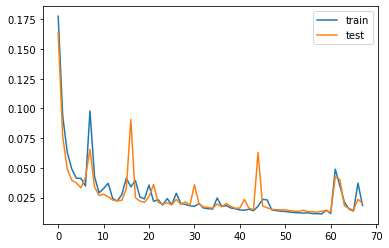

In [10]:
show_training_history(history)

In [11]:
eval_X, eval_y = preprocess(generate_dataset(10000))
model.evaluate(eval_X, eval_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0135


0.013471808284521103

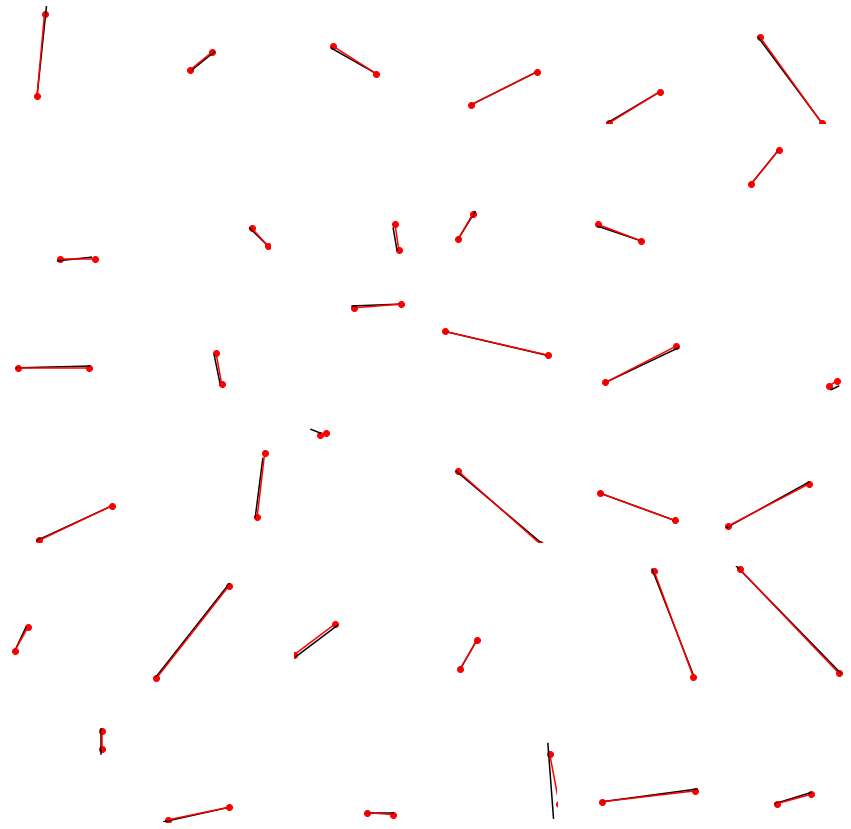

In [12]:
show_examples(model, 6)

In [13]:
# model.save('saved_models/mae_cnv32_avg_cnv64_avg_dns128_0_0060')

In [15]:
test = keras.models.load_model('../models/windows/mae_cnv32_avg_cnv64_avg_dns128_0_0060')
test.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 31, 31, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [16]:
eval_X, eval_y = preprocess(generate_dataset(10000))
test.evaluate(eval_X, eval_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0056


0.005645968951284885

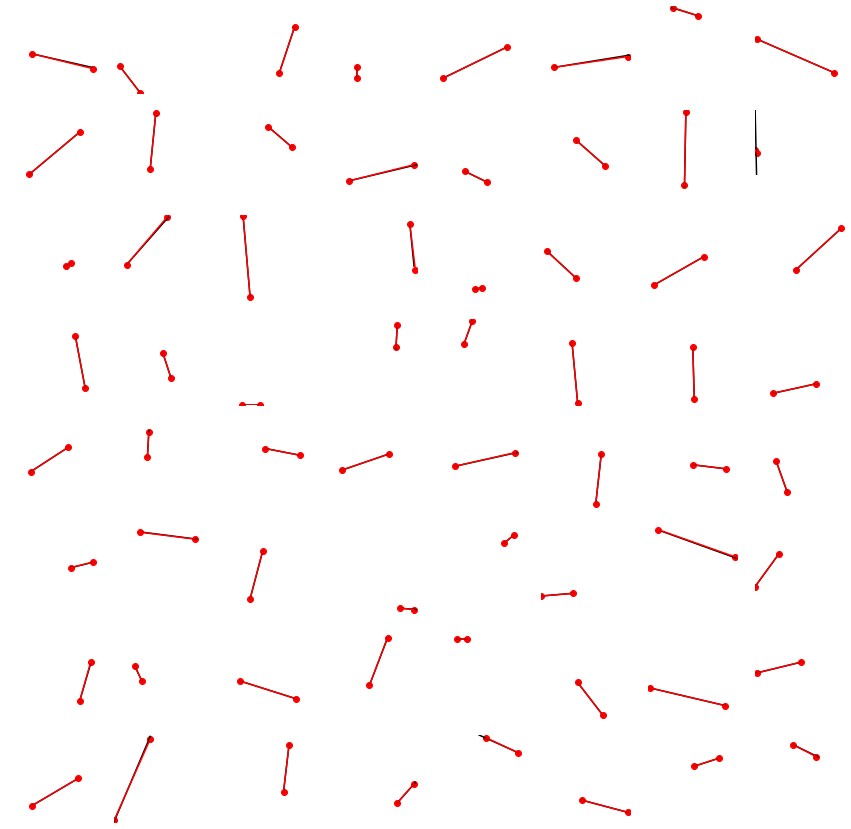

In [17]:
show_examples(test, 8)